<a href="https://colab.research.google.com/github/emma2763/Machine-Learning-Projects/blob/main/Advanced_Machine_Learning_Projects_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi, this is Meng Yang! I'm a Columbia QMSS student. Welcome to my Machine Learning projects portfolio!

Github repo link:



In [45]:
%%shell
jupyter nbconvert --to html /content/Advanced_Machine_Learning_Projects_Portfolio.ipynb

[NbConvertApp] Converting notebook /content/Advanced_Machine_Learning_Projects_Portfolio.ipynb to html
[NbConvertApp] Writing 969466 bytes to /content/Advanced_Machine_Learning_Projects_Portfolio.html


# 1. U.N. World Happiness Prediction (Tabular Data Classification)

Link: 

https://github.com/emma2763/Machine-Learning/blob/08b4c27c92e5a4133e0bbc81895151105f7922ed/my2763_5074_Assignment1.ipynb

## Dataset

This competition utilizes data from U.N. World Happiness Report. Training dataset contains 88 countries and areas, while test dataset contains 68 countries and areas. The goal is to predict happiness level (Very high, High, Average, Low, or Very low) from 7 numeric variables including GDP per capita, social support, freedom to make life choices, and so on as well as categorical variables such as region. This is a tabular data classification problem. Click the link above to explore more details!

## Models

I experimented with three types of models: Random Forest, Gradient Boosting, and keras models.

For Random Forest model, I tuned 2 hyper-parameters, n_estimators and max_depth. n_estimators=100 and max_depth=11 give my best model. However, max_depth of 7, 9, or 11 result in roughly the same performance (cross-validation score around 0.67).

For Gradient Boosting, I use GridSearchCV to tune the hyper-parameters: n_estimators,learning_rate, and max_depth. 

My third model is a keras model with 5 hidden layers, where activation is set to relu and sgd lr=0.01. But the model performances are still not satisfying (test accuracy about 0.4).

## Discussion and Improvement

In [1]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load world happiness competition data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/5074/worldhappiness.csv')

In [3]:
# Top 10 models from competition
df.head(10)

,Unnamed: 0,accuracy,f1_score,precision,recall,ml_framework,deep_learning,model_type,depth,num_params,...,relu_act,tanh_act,softmax_act,loss,optimizer,memory_size,team,username,timestamp,version
0,0,0.558824,0.539683,0.789773,0.592857,sklearn,NaN,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stellawong,2023-02-07 21:35:40.563162,885
1,1,0.558824,0.539394,0.682145,0.581429,sklearn,NaN,RandomForestClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,sdp2158,2023-02-06 19:39:59.372410,510
2,2,0.588235,0.576515,0.655916,0.595000,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yatharth,2023-01-31 22:48:33.976381,58
3,3,0.588235,0.576515,0.655916,0.595000,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,four,ran_liao,2023-02-04 20:55:33.079937,299
4,4,0.588235,0.576515,0.655916,0.595000,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xilin0323,2023-02-07 16:44:16.780532,734
5,5,0.558824,0.518891,0.695000,0.566429,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yatharth,2023-01-31 22:50:54.790660,66
6,6,0.558824,0.518891,0.695000,0.566429,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,francesyang,2023-02-04 23:46:39.294018,327
7,7,0.558824,0.518891,0.695000,0.566429,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yatharth,2023-01-31 22:51:49.885656,68
8,8,0.558824,0.518891,0.695000,0.566429,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,francesyang,2023-02-04 21:16:23.508811,305
9,9,0.558824,0.518891,0.695000,0.566429,sklearn,NaN,GradientBoostingClassifier,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6,francesyang,2023-02-04 23:31:26.263717,324


Even the best models are not performing very well with the highest accuracy of 0.56 and best precision of 0.79. However, these models are much better than mine. Let's analyze how they make it.

2 of top 10 models use RandomForestClassifier, and the other 8 use GradientBoostingClassifier.

In [4]:
df.describe()

,Unnamed: 0,accuracy,f1_score,precision,recall,depth,num_params,flatten_layers,batchnormalization_layers,dropout_layers,dense_layers,sigmoid_act,relu_act,tanh_act,softmax_act,memory_size,version
count,943.000000,932.000000,921.000000,921.000000,921.000000,165.000000,189.000000,3.0,2.0,5.000000,165.000000,3.0,164.000000,1.0,162.0,1.650000e+02,943.000000
mean,471.000000,0.439504,0.425186,0.543831,0.462755,5.175758,40307.555556,1.0,4.0,2.200000,5.042424,1.0,3.682927,4.0,1.0,1.859472e+05,472.000000
std,272.364951,0.078251,0.069070,0.095359,0.064909,1.864140,103082.914934,0.0,0.0,1.643168,1.628075,0.0,1.144505,NaN,0.0,4.366943e+05,272.364951
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,65.000000,1.0,4.0,1.000000,2.000000,1.0,1.000000,4.0,1.0,1.856000e+03,1.000000
25%,235.500000,0.411765,0.393425,0.507106,0.438571,4.000000,1539.000000,1.0,4.0,1.000000,4.000000,1.0,3.000000,4.0,1.0,1.568000e+04,236.500000
50%,471.000000,0.441176,0.435588,0.553968,0.467143,5.000000,16101.000000,1.0,4.0,1.000000,5.000000,1.0,4.000000,4.0,1.0,7.379200e+04,472.000000
75%,706.500000,0.470588,0.469382,0.603333,0.495714,6.000000,19013.000000,1.0,4.0,4.000000,5.000000,1.0,4.000000,4.0,1.0,8.021600e+04,707.500000
max,942.000000,0.588235,0.576515,0.789773,0.595000,13.000000,667755.000000,1.0,4.0,4.000000,10.000000,1.0,8.000000,4.0,1.0,2.673016e+06,943.000000


<Axes: >

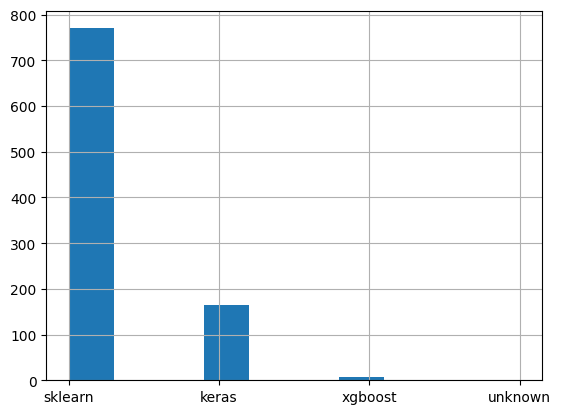

In [5]:
df['ml_framework'].hist()

<Axes: >

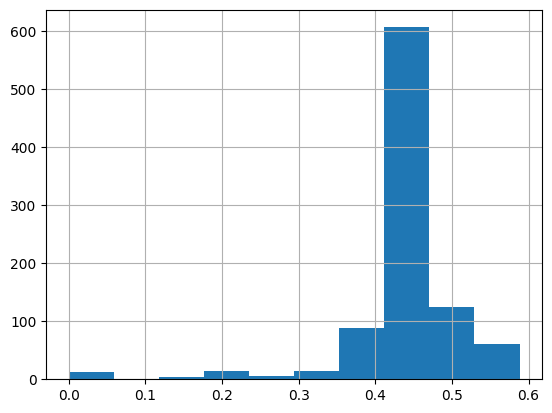

In [6]:
df['accuracy'].hist()

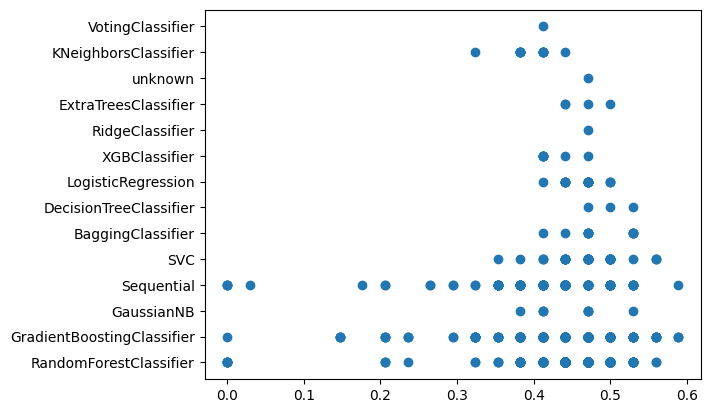

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df['accuracy'], df['model_type'])

Although some models built using GradientBoostingClassifier and Sequential are not good, some fine-tuned GradientBoostingClassifier and Sequential models give the best performance in this competition.

In [15]:
df_model = df.groupby(['model_type'])
df_model[['accuracy','f1_score','precision','recall']].mean() 

,accuracy,f1_score,precision,recall
model_type,,,,
BaggingClassifier,0.486425,0.475310,0.598911,0.505604
DecisionTreeClassifier,0.500000,0.476616,0.580404,0.520476
ExtraTreesClassifier,0.463235,0.427582,0.501122,0.467143
GaussianNB,0.447712,0.422746,0.546634,0.463333
GradientBoostingClassifier,0.434016,0.423912,0.556418,0.444885
KNeighborsClassifier,0.394958,0.389393,0.465441,0.409184
LogisticRegression,0.463904,0.448965,0.549719,0.487143
RandomForestClassifier,0.446445,0.428656,0.554536,0.477668
RidgeClassifier,0.470588,0.450271,0.599567,0.495714


On average, BaggingClassifier and DecisionTreeClassifier models perform pretty well.

In [16]:
df_optimizer = df.groupby(['optimizer'])
df_optimizer[['accuracy','f1_score','precision','recall']].mean() 

,accuracy,f1_score,precision,recall
optimizer,,,,
Adam,0.446524,0.424855,0.519903,0.462273
SGD,0.410736,0.395073,0.490802,0.441735
auto,0.470588,0.450271,0.599567,0.495714
lbfgs,0.468137,0.459074,0.557067,0.489524
liblinear,0.455882,0.413285,0.550193,0.481429
saga,0.460784,0.452534,0.534709,0.486190


'auto' optimizer is relatively better on average.

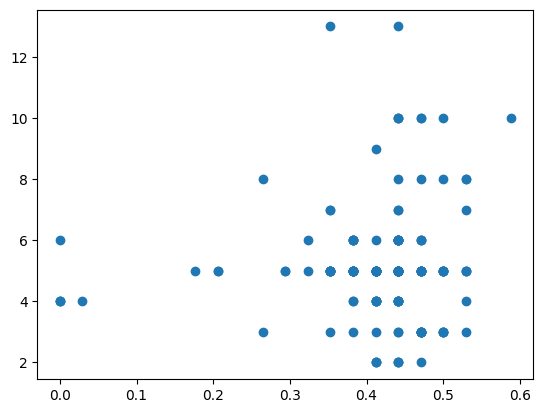

In [8]:
plt.scatter(df['accuracy'], df['depth'])

Not very deep models can achieve rather good performance.

Besides reflecting on machine learning models, notice that this is a rather small dataset, which means that machine learning algorithms may not be able to play out the advantage of learning from big data. How to split training and test data can also have an effect on model performance.

In addition to existing data variables, we can try to improve prediction performance by collecting data on more features that may help to predict happiness, for example, inflation rate.

# 2. Covid Detection Based on X-ray Data (Image Data Classification)

Link:

https://github.com/emma2763/Machine-Learning/blob/c6f70e4a0461dd49d7c702daa1f744e416c361b0/my2763_5074_assignment2.ipynb

## Dataset

Citation of paper providing original dataset: M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, “Can AI help in screening Viral and COVID-19 pneumonia?” arXiv preprint, 29 March 2020, https://arxiv.org/abs/2003.13145

The original dataset is consistent of 3616 Covid positive X-ray images, 10192 normal X-ray images, and 1345 Viral Pneumonia X-ray images. To make dataset balanced and smaller for ease of fitting models, the number of images for each category is reduced to first 1345. The images are in 'RGB' format and resized to 192x192. For more details and sample images, see the repo link.

The dataset contains images of three categories: Normal, Covid-19 positive, and non-covid viral pneumonia. Even from a non-medical point of view, we can easily tell that there is difference between normal lung and infected lung. Thus, if algorithm can be trained to predict COVID using X-ray images with high accuracy, then it provides a quick, cheap but effective and efficient way for diagnosis of COVID. Moreover, COVID images and non-covid viral pneumonia images have many similarities that it is difficult to tell the difference from eye-balling except for experienced doctors. Deep learning networks, hopefully, can learn the differences and tell aprt COVID from VIRAL PNEUMONIA. It would help to detect, treat and prevent COVID, especially in areas where PCR tests are too expensive and lack of medical personnel.

## Models

I trained 6 models to try to predict Covid from X-ray image. 

In model 1, I train a toy shallow CNN which performs not badly I would say since it has only several layers and one epoch. 

Model 2 uses callbacks to reduce learning rate when validation accuracy fails to improve, which improves model prediction performance slightly.

 I also try to train a VGG16 model (Model 3) by myself. It took over one hour to fit model and the model performed very poorly in prediction accuracy, which was not surprising because of constraints in computing power and dataset size.

Transfer Learning models, which utilized weights that had already well learnt from large amount of images, performed quite well. Both VGG19 and InceptionV3 achieved accuracy of over 0.81. At first I only added one dense layer of 112 nodes, which was not very satisfying. The models performed better after adding more layers to base models. I also experimented with optimizer and callbacks of learning rates. However, ResNet50 performed poorly and I need to take a closer look.

After discussing with my teammates, I tried VGG19 with 2 epochs as well as L2 regularization and batch normalization. But it seemed to lead to overfitting and prediction accuracy was just 0.52. Then I experimented with InceptionV3 and 2 epoches, which imcreased accuracy from 0.81 to 0.83. Finally, I trained InceptionV3 with L2 regularization and batch normalization. Accuracy was 0.63, worse than original InceptionV3 model.

I also rerun InceptionV3 model on augmented data by two methods. One is rorating 25 degree. The other is zooming up to 50% as well as horizontal and vertical flips. Unfortunately, I do not see improvement in model performance. The reason may be that the original dateset I used is already balanced and the size is not too small.

In summary, Transfer Learning using InceptionV3 with 2 epochs performed best. I add one GlobalAveragePooling2D layer and three dense layers(512, 256, and 128) to base model before output layer. 'Adam' optimizaer and callbacks are used. L2 regularization, batch normalization, and data augmentation does not improve model performance.

## Discussion and Improvement

In [17]:
# Load covid x-ray competition data
df = pd.read_csv('/content/drive/MyDrive/5074/covid-xray.csv')

In [18]:
# Top 10 models from competition
df.head(10)

,ACCURACY,F1_SCORE,PRECISION,RECALL,ML_FRAMEWORK,TRANSFER_LEARNING,DEEP_LEARNING,MODEL_TYPE,DEPTH,NUM_PARAMS,...,SELU_ACT,RELU_ACT,SOFTMAX_ACT,LOSS,OPTIMIZER,MEMORY_SIZE,TEAM,USERNAME,TIMESTAMP,VERSION
0,0.963594,0.963655,0.963831,0.963582,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,francesyang,2023-03-06 22:24:23.991057,23
1,0.962820,0.962653,0.963049,0.962801,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,francesyang,2023-03-06 22:17:54.696299,22
2,0.960496,0.960464,0.960560,0.960483,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rian,2023-03-13 11:40:42.548416,257
3,0.958172,0.958241,0.958765,0.958156,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,francesyang,2023-03-06 22:11:34.640494,20
4,0.955848,0.955900,0.956032,0.955830,unknown,NaN,NaN,unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,francesyang,2023-03-06 19:45:12.233035,9
5,0.952750,0.952791,0.953372,0.952738,keras,True,True,Functional,22.0,16779523.0,...,NaN,14.0,1.0,str,Adam,67122440.0,NaN,so2638,2023-03-14 01:59:51.789071,299
6,0.948877,0.948713,0.948737,0.948848,keras,NaN,True,Sequential,17.0,3811619.0,...,NaN,10.0,1.0,str,Adam,15249704.0,NaN,rian,2023-03-13 10:28:47.799171,256
7,0.946553,0.946628,0.947665,0.946546,keras,True,True,Sequential,36.0,19406083.0,...,NaN,25.0,1.0,str,Adam,77632408.0,NaN,jer2240,2023-03-12 20:43:58.909531,235
8,0.946553,0.946628,0.947665,0.946546,keras,True,True,Sequential,36.0,19406083.0,...,NaN,25.0,1.0,str,Adam,77632408.0,NaN,jer2240,2023-03-12 20:49:06.829332,236
9,0.944229,0.944166,0.944357,0.944211,keras,NaN,True,Sequential,26.0,117651.0,...,NaN,10.0,1.0,str,Adam,478136.0,NaN,oliverhegi,2023-03-07 22:42:33.431166,78


The top 10 models are quite good at predicting Covid from X-ray images! All performance measures are above 0.96! However, there is not much information for us to learn from the best 5 models. Top 6-10 models are built by keras and some of them use transfer learning. All use 'Adam' optimizer.

In [21]:
df.columns

Index(['ACCURACY', 'F1_SCORE', 'PRECISION', 'RECALL', 'ML_FRAMEWORK',
       'TRANSFER_LEARNING', 'DEEP_LEARNING', 'MODEL_TYPE', 'DEPTH',
       'NUM_PARAMS', 'AVERAGEPOOLING2D_LAYERS', 'CONV2D_LAYERS',
       'BATCHNORMALIZATION_LAYERS', 'DENSE_LAYERS', 'MAXPOOLING2D_LAYERS',
       'INPUTLAYER_LAYERS', 'AVERAGE_LAYERS', 'ADD_LAYERS',
       'GLOBALAVERAGEPOOLING2D_LAYERS', 'ZEROPADDING2D_LAYERS',
       'DROPOUT_LAYERS', 'DEPTHWISECONV2D_LAYERS', 'FLATTEN_LAYERS',
       'CONCATENATE_LAYERS', 'SIGMOID_ACT', 'SELU_ACT', 'RELU_ACT',
       'SOFTMAX_ACT', 'LOSS', 'OPTIMIZER', 'MEMORY_SIZE', 'TEAM', 'USERNAME',
       'TIMESTAMP', 'VERSION'],
      dtype='object')

In [20]:
df.head(10).describe()

,ACCURACY,F1_SCORE,PRECISION,RECALL,DEPTH,NUM_PARAMS,AVERAGEPOOLING2D_LAYERS,CONV2D_LAYERS,BATCHNORMALIZATION_LAYERS,DENSE_LAYERS,...,DEPTHWISECONV2D_LAYERS,FLATTEN_LAYERS,CONCATENATE_LAYERS,SIGMOID_ACT,SELU_ACT,RELU_ACT,SOFTMAX_ACT,MEMORY_SIZE,TEAM,VERSION
count,10.000000,10.000000,10.000000,10.000000,5.000000,5.000000e+00,2.0,5.000000,3.000000,5.000000,...,0.0,5.0,0.0,0.0,0.0,5.000000,5.0,5.000000e+00,0.0,10.000000
mean,0.953989,0.953984,0.954403,0.953974,27.400000,1.190419e+07,1.0,16.600000,3.666667,1.200000,...,NaN,1.0,NaN,NaN,NaN,16.800000,1.0,4.762302e+07,NaN,143.500000
std,0.007204,0.007198,0.007056,0.007203,8.473488,9.229543e+06,0.0,7.765307,4.618802,0.447214,...,NaN,0.0,NaN,NaN,NaN,7.661593,0.0,3.691892e+07,NaN,121.820679
min,0.944229,0.944166,0.944357,0.944211,17.000000,1.176510e+05,1.0,10.000000,1.000000,1.000000,...,NaN,1.0,NaN,NaN,NaN,10.000000,1.0,4.781360e+05,NaN,9.000000
25%,0.947134,0.947150,0.947933,0.947121,22.000000,3.811619e+06,1.0,10.000000,1.000000,1.000000,...,NaN,1.0,NaN,NaN,NaN,10.000000,1.0,1.524970e+07,NaN,22.250000
50%,0.954299,0.954345,0.954702,0.954284,26.000000,1.677952e+07,1.0,13.000000,1.000000,1.000000,...,NaN,1.0,NaN,NaN,NaN,14.000000,1.0,6.712244e+07,NaN,156.500000
75%,0.959915,0.959908,0.960111,0.959901,36.000000,1.940608e+07,1.0,25.000000,5.000000,1.000000,...,NaN,1.0,NaN,NaN,NaN,25.000000,1.0,7.763241e+07,NaN,251.000000
max,0.963594,0.963655,0.963831,0.963582,36.000000,1.940608e+07,1.0,25.000000,9.000000,2.000000,...,NaN,1.0,NaN,NaN,NaN,25.000000,1.0,7.763241e+07,NaN,299.000000


Increasing number of Conv2D layers and Batch Normalization seem to help improve model performance.

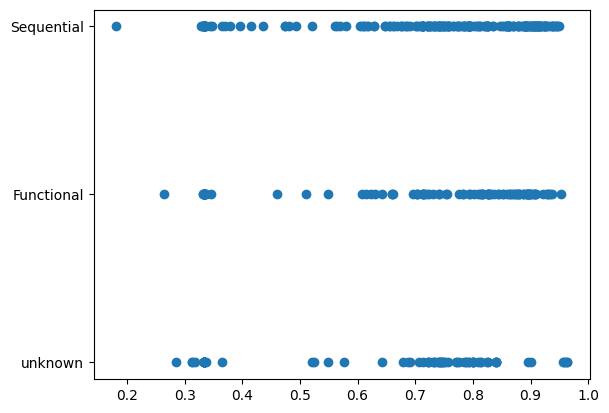

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df['ACCURACY'], df['MODEL_TYPE'])

In [26]:
df_model = df.groupby(['MODEL_TYPE'])
df_model[['ACCURACY','F1_SCORE','PRECISION','RECALL']].mean() 

,ACCURACY,F1_SCORE,PRECISION,RECALL
MODEL_TYPE,,,,
Functional,0.671383,0.618273,0.624867,0.671363
Sequential,0.704177,0.667913,0.680977,0.704113
unknown,0.647467,0.603570,0.609563,0.647399


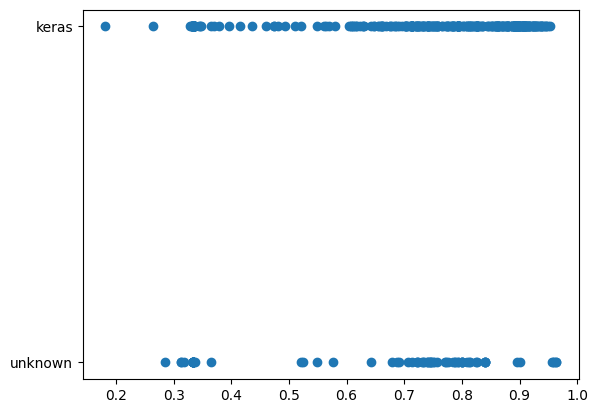

In [24]:
plt.scatter(df['ACCURACY'], df['ML_FRAMEWORK'])

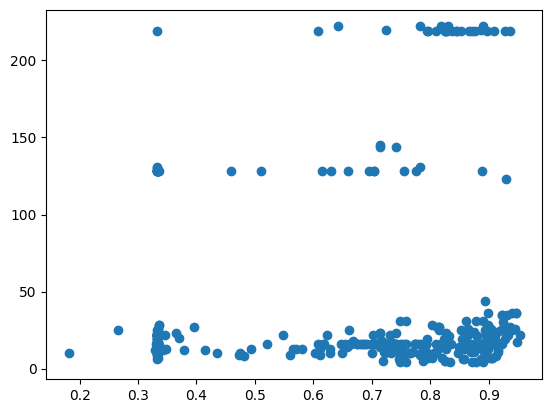

In [27]:
plt.scatter(df['ACCURACY'], df['DEPTH'])

In [28]:
df_model = df.groupby(['DEPTH'])
df_model[['ACCURACY','F1_SCORE','PRECISION','RECALL']].mean() 

,ACCURACY,F1_SCORE,PRECISION,RECALL
DEPTH,,,,
4.0,0.830106,0.829096,0.834023,0.830033
5.0,0.789117,0.787463,0.792106,0.789011
6.0,0.736019,0.701902,0.693078,0.736012
7.0,0.804415,0.785556,0.820702,0.804300
8.0,0.747483,0.728275,0.734350,0.747492
9.0,0.553945,0.477789,0.518766,0.553968
10.0,0.594817,0.534882,0.571522,0.594754
11.0,0.760586,0.743308,0.749720,0.760524
12.0,0.599183,0.534791,0.533451,0.599257


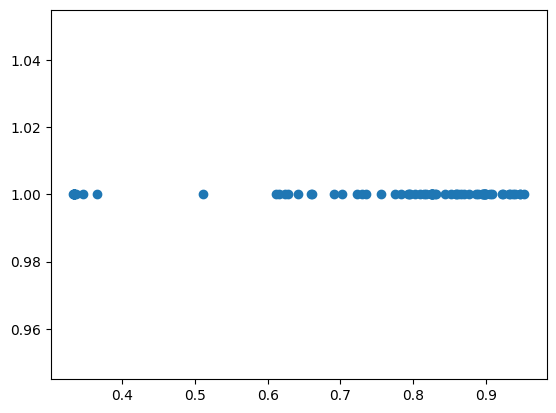

In [29]:
plt.scatter(df['ACCURACY'], df['TRANSFER_LEARNING'])

In [30]:
df_model = df.groupby(['TRANSFER_LEARNING'])
df_model[['ACCURACY','F1_SCORE','PRECISION','RECALL']].mean() 

,ACCURACY,F1_SCORE,PRECISION,RECALL
TRANSFER_LEARNING,,,,
True,0.699817,0.651183,0.659158,0.699785


Frances mentioned in class that she achieved that good performance by fine-tuning transfer learning model. Unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows us to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

# 3. Text Classification Using the Stanford SST Sentiment Dataset

Link:

https://github.com/emma2763/Machine-Learning-Projects/blob/311de03e7cd161fb01d5527f6b6d7f06699ccd95/my2763_assignment3.ipynb

## Dataset

The Stanford SST Sentiment Dataset contains movie reviews and labels of positive or negetive attitudes. Predicting labels is useful for rating movies, which benefits people who search for a good movie online. It can also help film industry to get feedback from audience and improve their movies.

Training dataset contains 6920 movie reviews and test dataset contains 1821 movie reviews. I use a tokenizer of maxlen=100 and max_words=12000 to build a vocabulary from training data.

## Models

I run several prediction models to try to predict the SST sentiment dataset well.

First, I use Embedding and LSTM layers. 
Overall, there is overfitting problem. There is problem of overfitting after training 10 epochs. So I try to train fewer epochs and use dropout to fight overfitting. Adding more LSTM layers improves model performance. 

Then, I experimented with Conv1D layers. However, My Conv1D model does not work well for this dataset. 

Finally, my transfer learning with Stanford glove embeddings achieves ~0.79 accuracy. Using well pretrained embeddings does help a lot. 

My best model is 3 LSTM layers with dropout, which achieves over 0.8 accuracy.

I try to tune dropout rates, improve number of epochs, use Bidirectional LSTM layers, and add more Dense layers on top of model. Improving number of epochs in transfer learning model seems to work well on train and validation data, but not on test data :( Increasing recurrent_dropout rate, adding more Dense layers, and Bidirectional LSTM improve prediction performance a bit.

## Comparison Analysis and Improvement

In [31]:
# Load covid x-ray competition data
df = pd.read_csv('/content/drive/MyDrive/5074/sstsentiment.csv')

In [32]:
# Top 10 models from competition
df.head(10)

,Unnamed: 0,accuracy,f1_score,precision,recall,ml_framework,transfer_learning,deep_learning,model_type,depth,...,softmax_act,tanh_act,relu_act,loss,optimizer,memory_size,team,username,timestamp,version
0,0,0.923161,0.923128,0.923962,0.923185,unknown,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rian,2023-04-13 08:36:38.662069,78
1,1,0.829857,0.829116,0.835855,0.829931,keras,NaN,True,Sequential,6.0,...,1.0,NaN,NaN,str,Adam,14417664.0,NaN,eminilkay,2023-04-14 21:58:42.929609,143
2,2,0.827662,0.827542,0.828508,0.827634,keras,True,True,Sequential,8.0,...,1.0,3.0,2.0,str,RMSprop,3323248.0,NaN,emmayang,2023-04-16 23:21:44.172156,234
3,3,0.825467,0.825058,0.828657,0.825521,keras,NaN,True,Sequential,4.0,...,1.0,1.0,NaN,str,RMSprop,691568.0,NaN,timnyt,2023-04-17 23:39:25.212314,327
4,4,0.825467,0.825425,0.825736,0.825451,keras,NaN,True,Sequential,6.0,...,NaN,2.0,1.0,str,RMSprop,3272592.0,NaN,sdp2158,2023-04-16 00:18:10.097860,195
5,5,0.819978,0.819941,0.820276,0.819995,keras,NaN,True,Sequential,3.0,...,1.0,NaN,NaN,str,RMSprop,445856.0,9.0,realdfy,2023-04-15 21:24:26.415222,184
6,6,0.818880,0.818838,0.819144,0.818864,keras,NaN,True,Sequential,4.0,...,1.0,1.0,NaN,str,RMSprop,749424.0,NaN,timnyt,2023-04-18 04:47:35.461666,385
7,7,0.817783,0.817765,0.817932,0.817794,keras,NaN,True,Sequential,6.0,...,1.0,NaN,2.0,str,Adam,3856424.0,NaN,francesyang,2023-04-12 20:01:33.618443,66
8,8,0.817783,0.817781,0.817789,0.817780,keras,NaN,True,Sequential,3.0,...,NaN,1.0,NaN,function,Adam,8675184.0,NaN,rian,2023-04-13 07:05:50.479257,76
9,9,0.816685,0.816486,0.817983,0.816650,keras,NaN,True,Sequential,5.0,...,1.0,2.0,NaN,str,RMSprop,699936.0,NaN,ran_liao,2023-04-17 00:05:07.190064,237


Yeah! Finally got my name listed in top 10!

In [33]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(12000, 64, input_length=100))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.5, return_sequences=True))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           768000    
                                                                 
 lstm (LSTM)                 (None, 100, 32)           12416     
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           24832     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 64)                8

My best model is this one: 1 Embedding layer, 3 LSTM layers, 1 Flatten layer, and 3 Dense layers with drop out. Train 5 epochs. Not transfer learning. Get performance measures around 0.83.

In [35]:
df.head(10).describe()

,Unnamed: 0,accuracy,f1_score,precision,recall,depth,num_params,embedding_layers,conv1d_layers,maxpooling1d_layers,...,globalaveragepooling1d_layers,dense_layers,batchnormalization_layers,sigmoid_act,softmax_act,tanh_act,relu_act,memory_size,team,version
count,10.00000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000e+00,9.0,1.0,1.0,...,0.0,9.000000,0.0,2.0,7.0,6.000000,3.000000,9.000000e+00,1.0,10.000000
mean,4.50000,0.832272,0.832108,0.833584,0.832280,5.000000,1.003331e+06,1.0,1.0,1.0,...,NaN,1.444444,NaN,1.0,1.0,1.666667,1.666667,4.014655e+06,9.0,192.500000
std,3.02765,0.032273,0.032297,0.032332,0.032281,1.658312,1.173968e+06,0.0,NaN,NaN,...,NaN,0.726483,NaN,0.0,0.0,0.816497,0.577350,4.696078e+06,NaN,107.529066
min,0.00000,0.816685,0.816486,0.817789,0.816650,3.000000,1.111380e+05,1.0,1.0,1.0,...,NaN,1.000000,NaN,1.0,1.0,1.000000,1.000000,4.458560e+05,9.0,66.000000
25%,2.25000,0.818057,0.818045,0.818273,0.818062,4.000000,1.746580e+05,1.0,1.0,1.0,...,NaN,1.000000,NaN,1.0,1.0,1.000000,1.500000,6.999360e+05,9.0,94.250000
50%,4.50000,0.822722,0.822500,0.823006,0.822723,5.000000,8.177620e+05,1.0,1.0,1.0,...,NaN,1.000000,NaN,1.0,1.0,1.500000,2.000000,3.272592e+06,9.0,189.500000
75%,6.75000,0.827113,0.827013,0.828620,0.827106,6.000000,9.638560e+05,1.0,1.0,1.0,...,NaN,2.000000,NaN,1.0,1.0,2.000000,2.000000,3.856424e+06,9.0,236.250000
max,9.00000,0.923161,0.923128,0.923962,0.923185,8.000000,3.603906e+06,1.0,1.0,1.0,...,NaN,3.000000,NaN,1.0,1.0,3.000000,2.000000,1.441766e+07,9.0,385.000000


In [36]:
df.columns

Index(['Unnamed: 0', 'accuracy', 'f1_score', 'precision', 'recall',
       'ml_framework', 'transfer_learning', 'deep_learning', 'model_type',
       'depth', 'num_params', 'embedding_layers', 'conv1d_layers',
       'maxpooling1d_layers', 'simplernn_layers', 'dropout_layers',
       'flatten_layers', 'lstm_layers', 'inputlayer_layers',
       'concatenate_layers', 'bidirectional_layers',
       'globalmaxpooling1d_layers', 'timedistributed_layers',
       'globalaveragepooling1d_layers', 'dense_layers',
       'batchnormalization_layers', 'sigmoid_act', 'softmax_act', 'tanh_act',
       'relu_act', 'loss', 'optimizer', 'memory_size', 'team', 'username',
       'timestamp', 'version'],
      dtype='object')

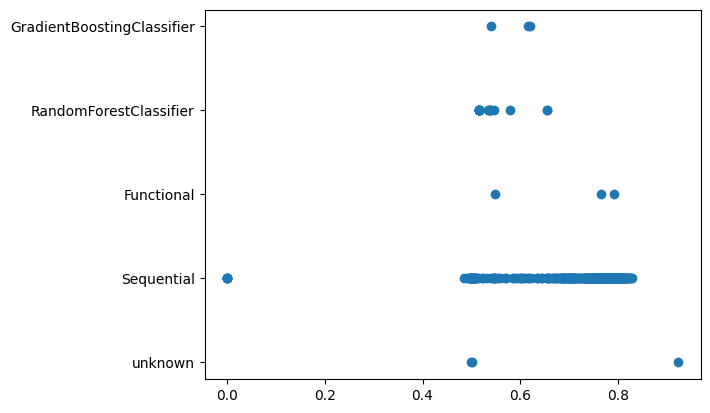

In [38]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df['accuracy'], df['model_type'])

In [40]:
df_model = df.groupby(['model_type'])
df_model[['accuracy','f1_score','precision','recall']].mean() 

,accuracy,f1_score,precision,recall
model_type,,,,
Functional,0.702159,0.686147,0.718306,0.702338
GradientBoostingClassifier,0.592023,0.553987,0.632494,0.592091
RandomForestClassifier,0.538020,0.413038,0.728521,0.538516
Sequential,0.713388,0.701233,0.725355,0.722880
unknown,0.641420,0.641403,0.641685,0.641426


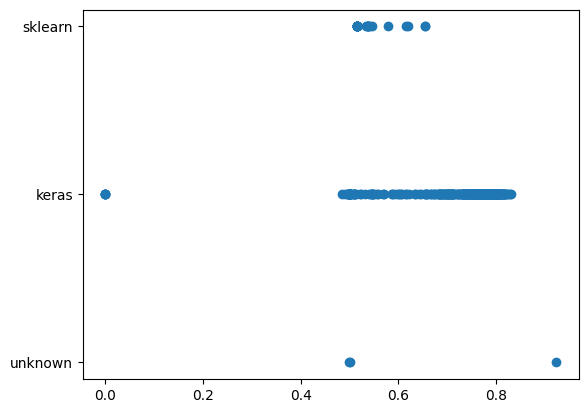

In [39]:
plt.scatter(df['accuracy'], df['ml_framework'])

In [41]:
df_model = df.groupby(['ml_framework'])
df_model[['accuracy','f1_score','precision','recall']].mean() 

,accuracy,f1_score,precision,recall
ml_framework,,,,
keras,0.713301,0.701115,0.725299,0.722719
sklearn,0.544501,0.429952,0.716998,0.544945
unknown,0.641420,0.641403,0.641685,0.641426


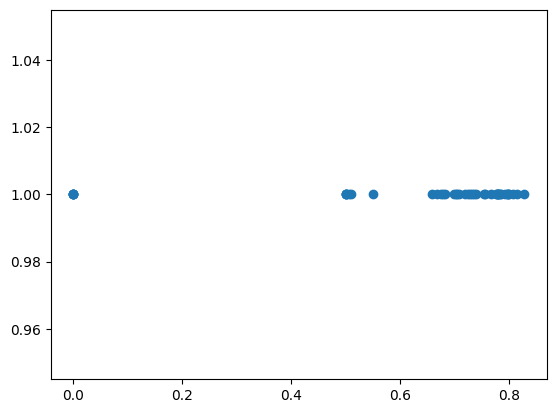

In [43]:
plt.scatter(df['accuracy'], df['transfer_learning'])

In [42]:
df_model = df.groupby(['transfer_learning'])
df_model[['accuracy','f1_score','precision','recall']].mean() 

,accuracy,f1_score,precision,recall
transfer_learning,,,,
True,0.632177,0.681858,0.698175,0.709291


In [44]:
df_model = df.groupby(['embedding_layers'])
df_model[['accuracy','f1_score','precision','recall']].mean() 

,accuracy,f1_score,precision,recall
embedding_layers,,,,
1.0,0.713729,0.701632,0.725694,0.723176


Top 10 models are sequential models using 'Adam' or 'RMSprop'	optimizer. They are not very deep and do not use transfer learning.